> <font size="4"> In this module we will explore different methods of captcha recoginition.<font>

original quality


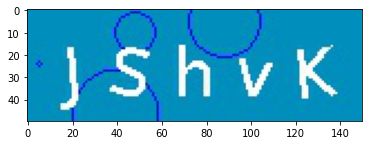

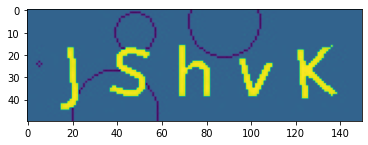

captcha recognise as: ana



In [11]:
import pytesseract
import cv2
from PIL import Image
import matplotlib.pyplot as plt
print("original quality")
image = cv2.imread("capa0.png")
im = Image.open("capa0.png") 
imgplot = plt.imshow(im)
plt.show()
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# this step converts image to black and white
imgplot2 = plt.imshow(img)
plt.show()
tessdata_config = r'--psm 7'
text = pytesseract.image_to_string(img, config=tessdata_config)
print("captcha recognise as:",text)

 <font size="4"> The above is a high quality image next we will see for a screenshot quality image
 <font>

screenshot quality


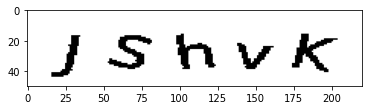

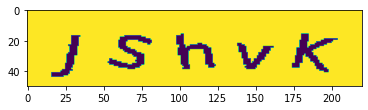

captcha recognise as: JSSanvk



In [20]:
print("screenshot quality")
image = cv2.imread("capt0.png")
im = Image.open("capt0.png") 
imgplot = plt.imshow(im)
plt.show()
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# this step converts image to black and white
imgplot2 = plt.imshow(img)
plt.show()
tessdata_config = r'--psm 7'
text = pytesseract.image_to_string(img, config=tessdata_config)
print("captcha recognise as:",text)

 <font size="4"> We can clearly see the change in accuracy.
 <font>

 > <font size="4"> Now we will use easyocr
 <font>

original quality


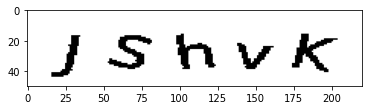

JShvk
screenshot quality


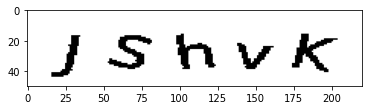

JShvK


In [14]:
import easyocr
print("original quality")
image = cv2.imread("capa0.png")
imgplot = plt.imshow(im)
plt.show()
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('capa0.png' ,detail = 0)
values = ','.join(str(v) for v in result)
text = values
C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
print(text)
print("screenshot quality")
image = cv2.imread("capt0.png")
imgplot = plt.imshow(im)
plt.show()
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('capt0.png' ,detail = 0)
values = ','.join(str(v) for v in result)
text = values
C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
print(text)

<font size="4"> Even though the accuracy has increased the difference in quality still matters.
 <font>

<font size="4"> Now we will highlight the text and remove the background noise to increase accuracy.

original quality


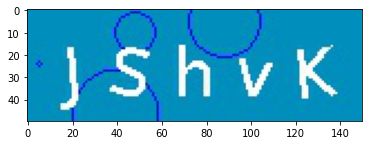

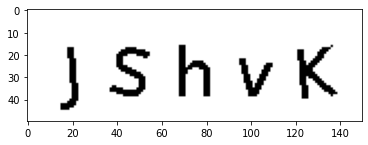

JShvK
screenshot quality


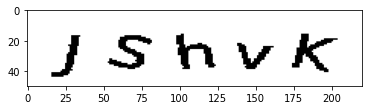

JShvK
--- 7.066714286804199 seconds ---


In [18]:
import time
import numpy as np
start_time = time.time()
print("original quality")
im = Image.open('capa0.png') 
imgplot = plt.imshow(im)
plt.show()# Can be many different formats.
im = im.convert('RGB')
pix = im.load()
his = im.histogram()
pix_size = im.size
im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
for x in range(pix_size[0]):
    for y in range(pix_size[1]):
        if np.mean(pix[x,y]) > 150:
            im2.putpixel((x, y),(0, 0, 0)) 
im2.save("newlogo.png")
im = Image.open('newlogo.png') 
imgplot = plt.imshow(im)
plt.show()
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('newlogo.png' ,detail = 0)
values = ','.join(str(v) for v in result)
text = values
C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
print(text)
print("screenshot quality")
im = Image.open('capt0.png') 
imgplot = plt.imshow(im)
plt.show()# Can be many different formats.
im = im.convert('RGB')
pix = im.load()
his = im.histogram()
pix_size = im.size
im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
for x in range(pix_size[0]):
    for y in range(pix_size[1]):
        if np.mean(pix[x,y]) > 150:
            im2.putpixel((x, y),(0, 0, 0)) 
im2.save("newlogo.png")
im = Image.open('newlogo.png') 
#imgplot = plt.imshow(im)
#plt.show()
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('capt0.png' ,detail = 0)
values = ','.join(str(v) for v in result)
text = values
C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
print(text)
print("--- %s seconds ---" % (time.time() - start_time))

<font size="4"> Now we can detect both quality captcha text better for this image.<font>

In [ ]:
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.select import Select
from selenium.webdriver import ActionChains
from selenium.common.exceptions import NoSuchElementException
import time 
import progressbar
from selenium.webdriver.common.alert import Alert
import sys
from selenium.webdriver.chrome.options import Options
import urllib.request
import pyautogui
from PIL import Image
from time import sleep

def get_captcha(driver, element, path):
    # now that we have the preliminary stuff out of the way time to get that image :D
    location = element.location
    size = element.size
    # saves screenshot of entire page
    driver.save_screenshot(path)

    # uses PIL library to open image in memory
    image = Image.open(path)

    left = location['x']+3
    top = location['y'] +4
    right = location['x'] + size['width']-3
    bottom = location['y'] + size['height'] -2

    image = image.crop((left, top, right, bottom))  # defines crop points
    image.save(path, 'png', optimize=True, quality=100)  # saves new cropped image
l=2000
bar = progressbar.ProgressBar(maxval=l, \
    widgets=[progressbar.Bar('█', '[', ']'), ' ', progressbar.Percentage()])
start_time = time.time()
capa = DesiredCapabilities.CHROME
chrome_options = Options()
chrome_options.add_argument('headless');
capa["pageLoadStrategy"] = "normal"
driver = webdriver.Chrome(options=chrome_options, executable_path='/home/srijithreddy/Desktop/Srijith reddy/chromedriver')
driver.get("https://aims.iith.ac.in/aims/")
driver.maximize_window()
text = []
bar.start()
for i in range(l): 
    bar.update(i+1)
    time.sleep(3)
    try:
        img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div/div/form/div[1]/div[3]/div/img")
    except NoSuchElementException:
        driver.refresh()
        try:
            img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div/div/form/div[1]/div[3]/div/img")
        except NoSuchElementException:
            driver.refresh()
            try:
                img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div/div/form/div[1]/div[3]/div/img")
            except NoSuchElementException:
                driver.refresh()
                try:
                    img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div/div/form/div[1]/div[3]/div/img")
                except NoSuchElementException:
                    driver.refresh()
                    
    #action = ActionChains(driver)
    #action.context_click(img).perform() 
    #pyautogui.press('down', presses=2) 
    #pyautogui.press('enter')  
    #time.sleep(8)
    #pyautogui.press(['n', 'e', 'w',str(i)])
    #pyautogui.press('enter')  

    
    try:
        src = img.get_attribute('src')
    except:
        print("Continuing loop with error")
        continue
    try:
    #urllib.request.urlretrieve(src, "/home/srijithreddy/Desktop/Srijith reddy/solving_captchas_code_examples/database/"+str(logoSRC[len(logoSRC)-5:len(logoSRC)])+".png")
        l2 = driver.find_element_by_xpath('//*[@id="appCaptchaLoginImg"]')
    except:
        continue
    try:
        logoSRC = l2.get_attribute("src");
    except:
        continue
       # text+=[str(logoSRC[len(logoSRC)-5:len(logoSRC)])]
    try:
        get_captcha(driver, img, "/home/srijithreddy/Desktop/Srijith reddy/Hacking/solving_captchas_code_examples/database/"+str(logoSRC[len(logoSRC)-5:len(logoSRC)])+".png")
    except:
        continue
    try:
        urllib.request.urlretrieve(src, "/home/srijithreddy/Desktop/Srijith reddy/Hacking/solving_captchas_code_examples/database2/"+str(logoSRC[len(logoSRC)-5:len(logoSRC)])+".png")
        driver.refresh()
    except:   
        driver.refresh()
        print("Continuing loop with error")
        continue
    #print(text)
    
bar.finish()
print("--- %s Minutes ---" % ((time.time() - start_time)/60))

Continuing loop with error


Continuing loop with error


Continuing loop with error


Continuing loop with error


In [7]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import progressbar
import easyocr
import time
from time import sleep
bar = progressbar.ProgressBar(maxval=500, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
start_time = time.time()
def change_image(Path,en):
    im = Image.open(Path) 
    imgplot = plt.imshow(im)
    if en:
        plt.show()# Can be many different formats.
    im = im.convert('RGB')
    pix = im.load()
    his = im.histogram()
    pix_size = im.size
    im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
    nep = []
    for x in range(pix_size[0]):
        for y in range(pix_size[1]):
            if np.mean(pix[x,y]) > 150:
                im2.putpixel((x, y),(0, 0, 0)) 
    im2.save("newlogo.png")
def read_cap(Path,en):
    img = mpimg.imread(Path)
    imgplot = plt.imshow(img)
    if en :
        plt.show()
    reader = easyocr.Reader(['en']) # need to run only once to load model into memory
    result = reader.readtext(Path ,detail = 0)
    values = ','.join(str(v) for v in result)
    result=values.replace(" ", "")
    result=result.replace(",", "")
    result=result.replace("O", "")
    text = result
    C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
    for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
    #print(text) 
    return(text)
def read_cap2(Path,en):
    im = Image.open(Path)
    img1 = mpimg.imread(Path)
    imgplot = plt.imshow(img1)
    if en :
        plt.show()
    image = cv2.imread(Path)
    
    img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    tessdata_config = r'--psm 7'
    text = pytesseract.image_to_string(img, config=tessdata_config)
    C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
    for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
    #print(text)
    return(text)

Accuracy :48.019366197183096%


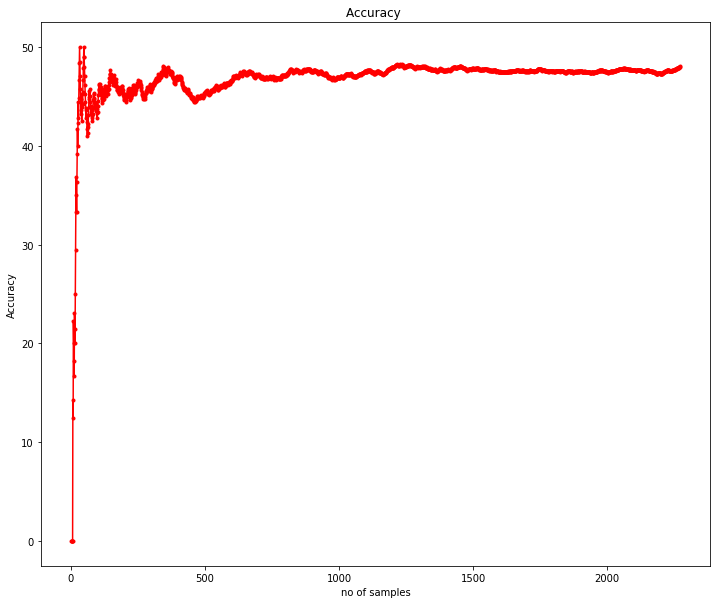

In [20]:
import os
import os.path
import cv2
import glob
import imutils
from IPython.display import clear_output
import time
CAPTCHA_IMAGE_FOLDER = "/home/srijithreddy/Desktop/Srijith reddy/Hacking/solving_captchas_code_examples/database"


# Get a list of all the captcha images we need to process
captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))
Accuracy=[]
count=0
# loop over the image paths
for (i, captcha_image_file) in enumerate(captcha_image_files):
    
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)),end="\r")

    # Since the filename contains the captcha text (i.e. "2A2X.png" has the text "2A2X"),
    # grab the base filename as the text
    filename = os.path.basename(captcha_image_file)
    captcha_correct_text = os.path.splitext(filename)[0]
    change_image(captcha_image_file,True)
    s = read_cap('newlogo.png',True)
    clear_output(wait=True)
    if len(s)==5:       
        if str(s) == captcha_correct_text:
            count = count +1
    Accuracy+= [100*count/(i+1)]
    print("Accuracy :"+ str(100*count/(i+1))+"%")
    figure1=plt.figure(1,figsize=(15,10))
    plt.plot(np.linspace(1,len(Accuracy),num=len(Accuracy)),Accuracy,'r-o',markersize=3)
    plt.title('Accuracy ')
    plt.xlabel('no of samples')
    plt.ylabel('Accuracy')
    plt.show()
    # Load the image and convert it to grayscale

## Accuarcy Vs Number of photos for screenshot quality using EasyOCR.

Accuracy :69.4692144373673%
Estimated time left: 0.0 Minutes


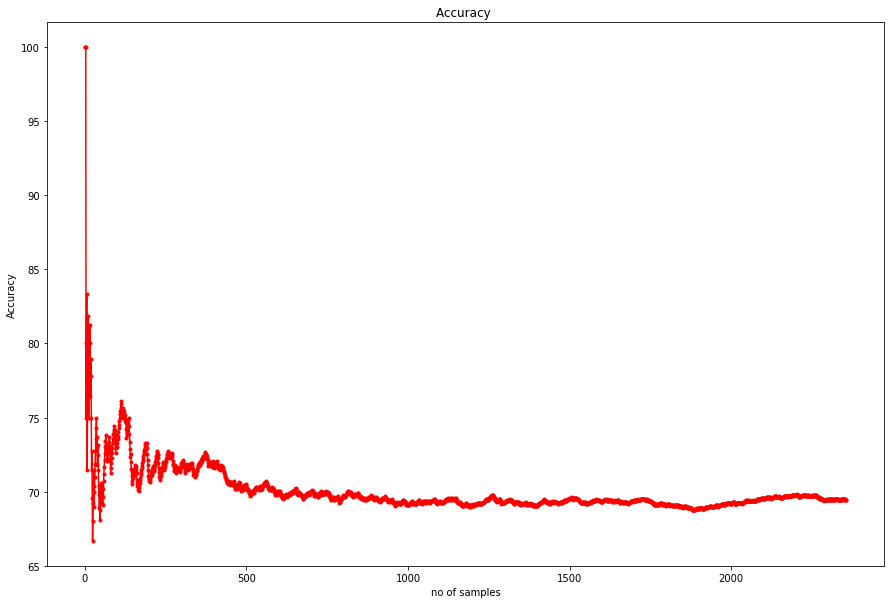

In [30]:
import os
import os.path
import cv2
import glob
import imutils
from IPython.display import clear_output
import time
CAPTCHA_IMAGE_FOLDER = "/home/srijithreddy/Desktop/Srijith reddy/Hacking/solving_captchas_code_examples/database2"


# Get a list of all the captcha images we need to process
captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))
Accuracy=[]
count=0
start_time = time.time()
# loop over the image paths
for (i, captcha_image_file) in enumerate(captcha_image_files):
    
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)),end="\r")

    # Since the filename contains the captcha text (i.e. "2A2X.png" has the text "2A2X"),
    # grab the base filename as the text
    filename = os.path.basename(captcha_image_file)
    captcha_correct_text = os.path.splitext(filename)[0]
    change_image(captcha_image_file,True)
    s = read_cap('newlogo.png',True)
    clear_output(wait=True)
    if len(s)==5:       
        if str(s) == captcha_correct_text:
            count = count +1
    Accuracy+= [100*count/(i+1)]
    print("Accuracy :"+ str(100*count/(i+1))+"%")
    print("Estimated time left: "+str((time.time()-start_time)*(len(captcha_image_files)-(i+1))/(60*(i+1)))+str(' Minutes'))
    figure1=plt.figure(1,figsize=(15,10))
    plt.plot(np.linspace(1,len(Accuracy),num=len(Accuracy)),Accuracy,'r-o',markersize=3)
    plt.title('Accuracy ')
    plt.xlabel('no of samples')
    plt.ylabel('Accuracy')
    plt.show()
    # Load the image and convert it to grayscale

## Accuarcy Vs Number of photos for High quality using EasyOCR.

Accuracy :8.475864690231852%
Estimated time left: 0.0 Minutes


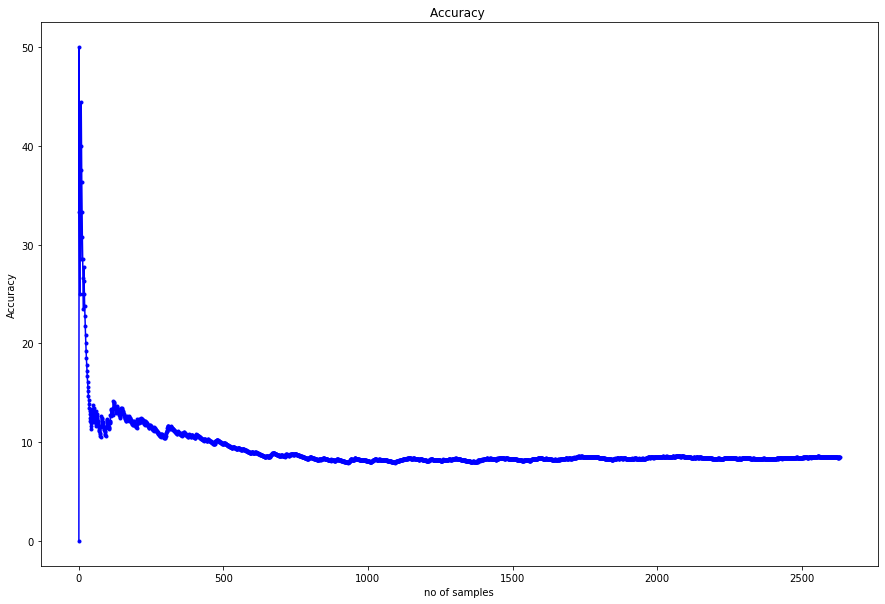

Actual Time Taken:  37.51608924070994  Minutes


In [8]:
import os
import os.path
import cv2
import glob
import imutils
from IPython.display import clear_output
import time
CAPTCHA_IMAGE_FOLDER = "/home/srijithreddy/Desktop/Srijith reddy/Hacking/solving_captchas_code_examples/database"


# Get a list of all the captcha images we need to process
captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))
Accuracy=[]
count=0
start_time = time.time()
# loop over the image paths
for (i, captcha_image_file) in enumerate(captcha_image_files):
    
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)),end="\r")

    # Since the filename contains the captcha text (i.e. "2A2X.png" has the text "2A2X"),
    # grab the base filename as the text
    filename = os.path.basename(captcha_image_file)
    captcha_correct_text = os.path.splitext(filename)[0]
    change_image(captcha_image_file,True)
    s = read_cap2('newlogo.png',True)
    clear_output(wait=True)
    if len(s)==5:       
        if str(s) == captcha_correct_text:
            count = count +1
    Accuracy+= [100*count/(i+1)]
    print("Accuracy :"+ str(100*count/(i+1))+"%")
    print("Estimated time left: "+str((time.time()-start_time)*(len(captcha_image_files)-(i+1))/(60*(i+1)))+str(' Minutes'))

    figure1=plt.figure(1,figsize=(15,10))
    plt.plot(np.linspace(1,len(Accuracy),num=len(Accuracy)),Accuracy,'b-o',markersize=3)
    plt.title('Accuracy ')
    plt.xlabel('no of samples')
    plt.ylabel('Accuracy')
    plt.show()
print("Actual Time Taken:  %s  Minutes"%((time.time()-start_time)/60))  # Load the image and convert it to grayscale

## Accuarcy Vs Number of photos for Screenshot quality using Tesseract.

Accuracy :32.25211942499079%
Estimated time left: 0.0 Minutes


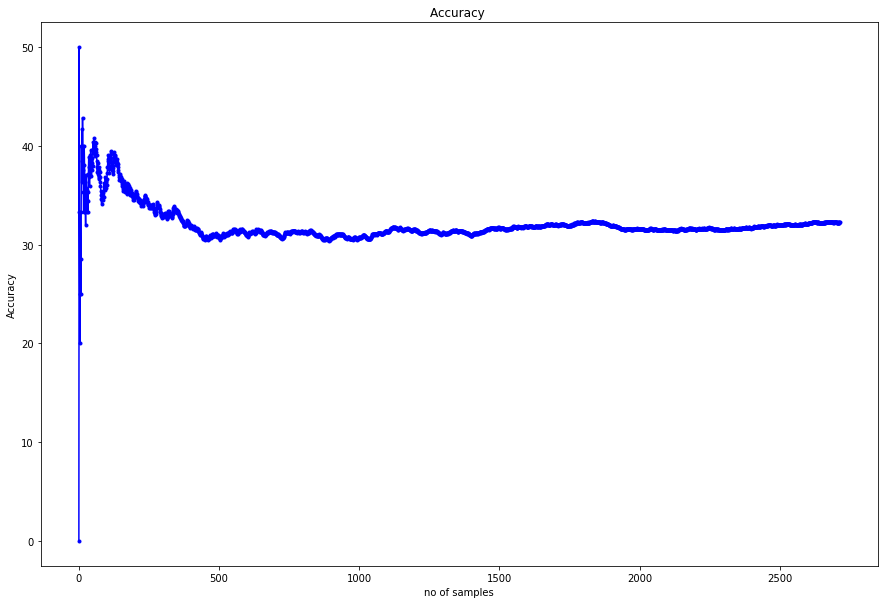

Actual Time Taken:  38.06862867673238  Minutes


In [9]:
import os
import os.path
import cv2
import glob
import imutils
from IPython.display import clear_output
import time
CAPTCHA_IMAGE_FOLDER = "/home/srijithreddy/Desktop/Srijith reddy/Hacking/solving_captchas_code_examples/database2"


# Get a list of all the captcha images we need to process
captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))
Accuracy=[]
count=0
start_time = time.time()
# loop over the image paths
for (i, captcha_image_file) in enumerate(captcha_image_files):
    
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)),end="\r")

    # Since the filename contains the captcha text (i.e. "2A2X.png" has the text "2A2X"),
    # grab the base filename as the text
    filename = os.path.basename(captcha_image_file)
    captcha_correct_text = os.path.splitext(filename)[0]
    change_image(captcha_image_file,True)
    s = read_cap2('newlogo.png',True)
    clear_output(wait=True)
    if len(s)==5:       
        if str(s) == captcha_correct_text:
            count = count +1
    Accuracy+= [100*count/(i+1)]
    print("Accuracy :"+ str(100*count/(i+1))+"%")
    print("Estimated time left: "+str((time.time()-start_time)*(len(captcha_image_files)-(i+1))/(60*(i+1)))+str(' Minutes'))
    figure1=plt.figure(1,figsize=(15,10))
    plt.plot(np.linspace(1,len(Accuracy),num=len(Accuracy)),Accuracy,'b-o',markersize=3)
    plt.title('Accuracy ')
    plt.xlabel('no of samples')
    plt.ylabel('Accuracy')
    plt.show()
    # Load the image and convert it to grayscale
print("Actual Time Taken:  %s  Minutes"%((time.time()-start_time)/60))     

## Accuarcy Vs Number of photos for High quality using Tesseract.

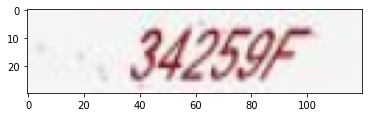

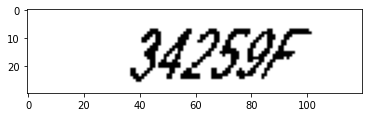

In [10]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
def change_image(Path):
    im = Image.open(Path) # Can be many different formats.
    im = im.convert('RGB')
    pix = im.load()
    his = im.histogram()
    #print(his)
    pix_size = im.size
    im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
    nep = []
    for x in range(pix_size[0]):
        for y in range(pix_size[1]):
            if np.mean(pix[x,y]) > 160:
                im2.putpixel((x, y),(0, 0, 0)) 
    im2.save("newlogo.png")
# intializing the list
# initializing dict to store frequency of each element
im = Image.open("Logo5.png") 
imgplot = plt.imshow(im)
plt.show()
change_image("Logo5.png")
change_image("newlogo.png")
im = Image.open("newlogo.png") 
imgplot = plt.imshow(im)
plt.show()
#blue (0,145,187,255)
        # Get the width and hight of the image for iterating over# Get the RGBA Value of the a pixel of an image
# Set the RGBA Value of the image (tuple)
  # Save the modified pixels as .png